In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',None)

In [ ]:
dataset=pd.read_csv('https://drive.google.com/u/0/uc?id=1WwLxmK8PMLjjgG_Zh1Nkh02ZN2-3Wiyl&export=download')
dataset.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
df = dataset.copy()
df.drop(columns=['Unnamed: 0'],inplace=True)

#Exporatory Data Analysis (EDA)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category'],
      dtype='object')

In [ ]:
# memisahkan feature numeric dengan categorical
nums = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city','province', 'category']

In [ ]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


Observasi :

* Feature Daily Time Spent on Site distribusinya skewed
* Feature Age distribusinya tampak mendekati normal
* Feature Area Income distribusinya tampak skewed
* Feature Daily Internet Usage distribusinya tampak mendekati normal

In [ ]:
df[cats].describe().transpose()

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


Observasi :

* Feature Male didominasi oleh label perempuan, yaitu sebanyak 518 dari 997
* Feature Timestamp tipe datanya dapat diubah dari object menjadi datetime untuk mempermudah analisis
* Feature Clicked on Ad memiliki jumlah yang seimbang antara label No dengan label Yes
* Feature city didominasi oleh Surabaya
* Feature province didominasi oleh Daerah Khusus Ibukota Jakarta
* Feature category didominasi oleh Otomotif

Berikut merupakan detail nilai dari masing-masing label

In [ ]:
for i in cats :
  print('---'*10)
  print(i)
  print(df[i].value_counts()) 

------------------------------
Male
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
------------------------------
Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64
------------------------------
Clicked on Ad
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
------------------------------
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               

#Feature Engineering : Feature Timestamp

In [ ]:
#check dtype
df.Timestamp.dtype

dtype('O')

In [ ]:
import datetime
df.Timestamp = pd.to_datetime(df.Timestamp)     

In [ ]:
df.Timestamp.dtype

dtype('<M8[ns]')

In [ ]:
df['month']=df.Timestamp.dt.month
df.month.unique()

array([3, 4, 1, 6, 5, 7, 2])

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,month
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,3
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,1
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,6


#Univariate Analysis

##Numerical Features

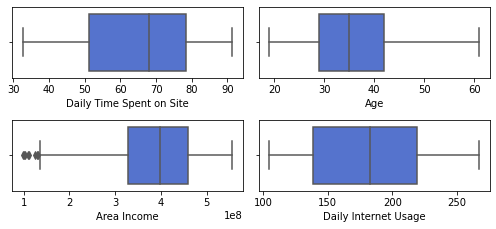

In [ ]:
plt.figure(figsize=(7,6))
for i in range(0, len(nums)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[nums[i]], color='royalblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

Observasi :

* Outliers hanya ada pada feature Area Income
* Feature Daily Time Spent on Site, Age, dan Area Income distribusinya sedikit skewed
* Feature Daily Internet Usage distribusinya mendeketi normal

In [ ]:
nums2 = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

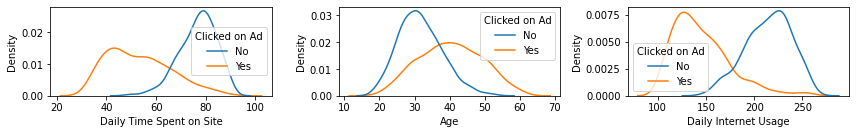

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums2)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[nums2[i]],hue=df['Clicked on Ad'])
    plt.xlabel(nums2[i])
    plt.tight_layout()

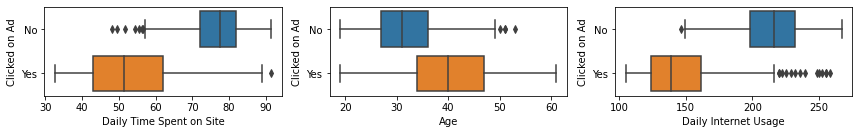

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums2)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[nums2[i]],y=df['Clicked on Ad'])
    plt.xlabel(nums2[i])
    plt.tight_layout()

Observasi :

* User yang mengklik Ads adalah user dengan Daily Time Spend on Site sekitar 40-45 menit. Sedangkan, user yang tidak mengklik Ads adalah user dengan Daily Time Spend on Site sekitar 75-80 menit.
* User yang mengklik Ads rata-rata ada pada usia(Age) 40 tahun. Sedangkan, user yang tidak mengklik Ads sebagian besar ada pada usia(Age) 30 tahun.
* User dengan Daily Internet Usage sekitar 100-150 cenderung mengklik Ads. Sedangkan, user dengan Daily Internet Usage sekitar 200-250 cenderung tidak mengklik Ads.

##Categorical Features

Feature Timestamp diganti dengan feature month agar lebih representatif

In [ ]:
cats2 = ['Male','month','Clicked on Ad','city', 'province', 'category']

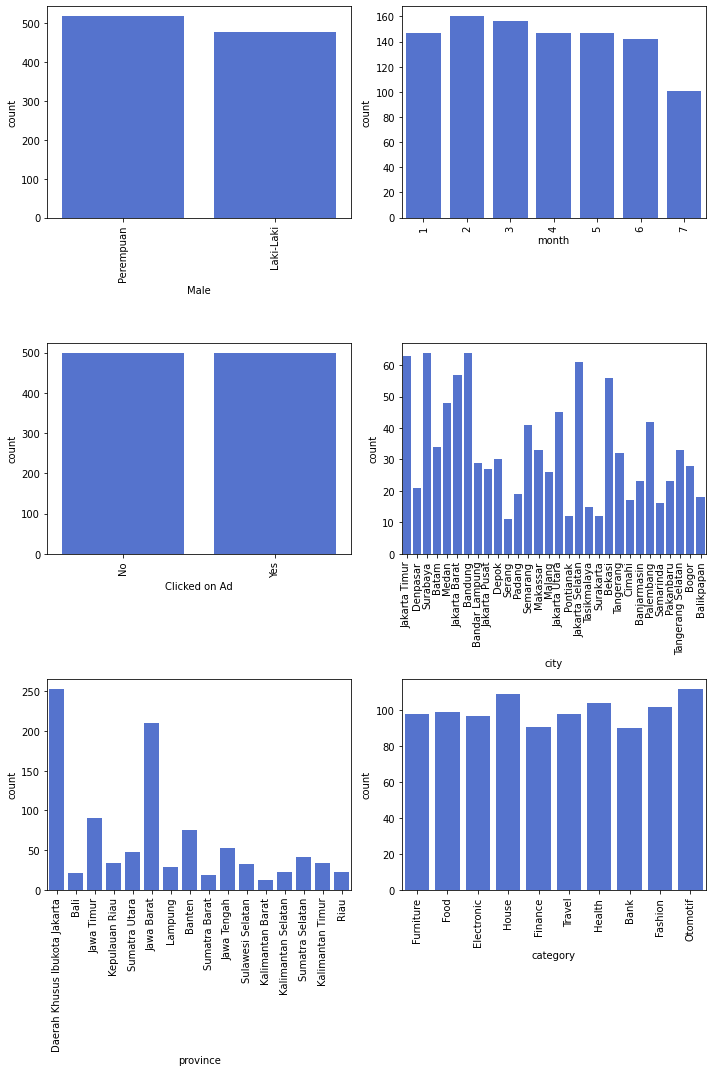

In [ ]:
plt.figure(figsize=(10,15))
for i in range(0, len(cats2)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats2[i]],color='royalblue')
    plt.xlabel(cats2[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

Observasi :

* Label Perempuan dan Laki-Laki pada feature Male tidak terlalu timpang
* Label Yes dan No pada feature Clicked on Ad balance
* Feature province didominasi oleh 2 nilai

#Bivariate Analysis

##Numerical Features

Except Area Income

<Figure size 576x576 with 0 Axes>

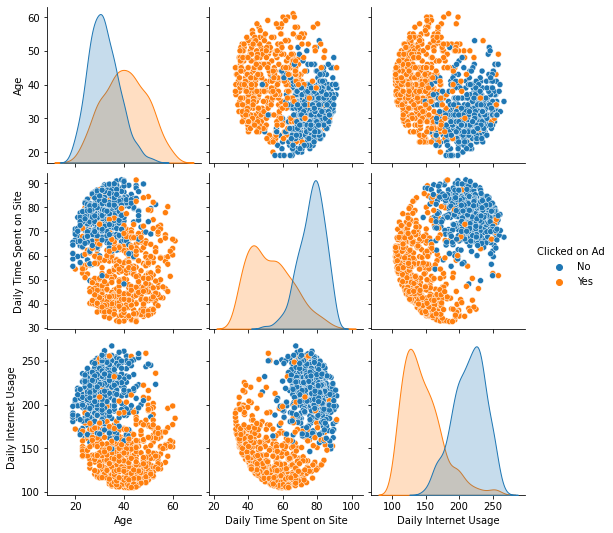

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df[['Age','Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')
plt.show()

Observasi :

* Semakin tua usia (Age) user serta semakin sedikit Daily Internet Usage dan Daily Time Spent on Site maka seorang user cenderung mengklik Ads.
* Semakin sedikit Daily Internet Usage dan Daily Time Spent on Site maka seorang user cenderung mengklik Ads.

##Categorical Features

In [ ]:
cats3 = ['Male','month', 'city', 'province', 'category']

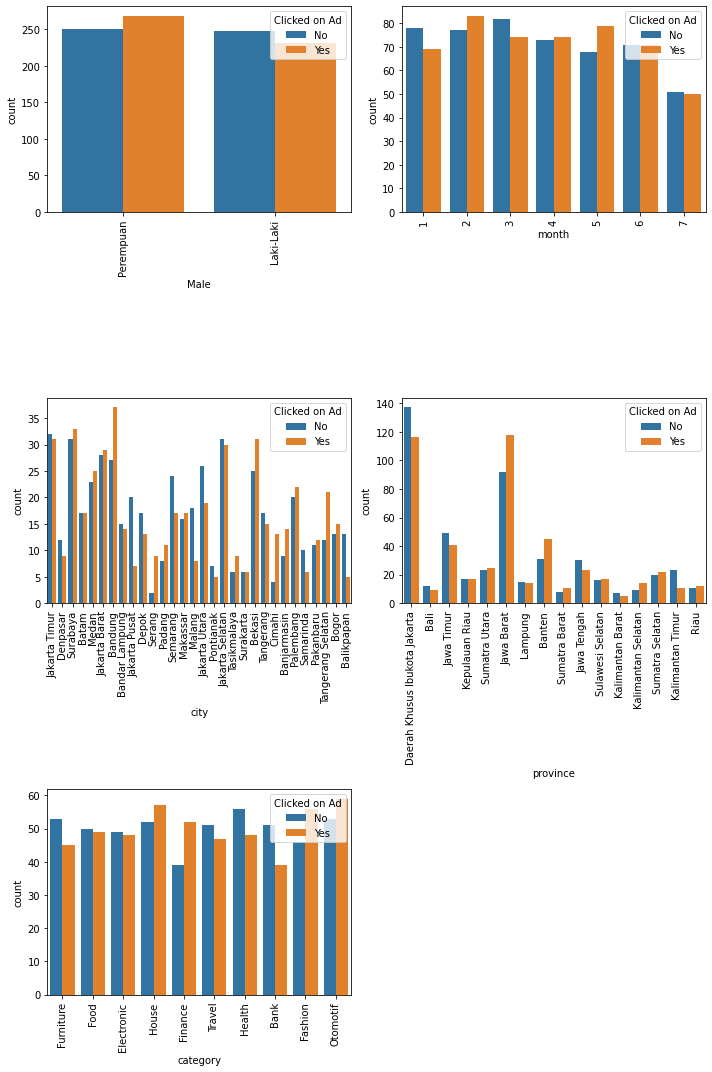

In [ ]:
plt.figure(figsize=(10,15))
for i in range(0, len(cats3)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats3[i]], hue=df['Clicked on Ad'])
    plt.xlabel(cats3[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

Observasi :

* Pada feature Male, user perempuan lebih banyak mengklik Ads dibandingkan dengan user laki-laki
* Setiap bulannya, perbandingan jumlah antara user yang mengklik/tidak Ads hampir sebanding. Perbedaaan yang cukup signifikan terdapat pada bulan ke 12, dimana jumlah user yang mengklik Ads 2 kali lebih banyak dibandingkan yang tidak mengklik Ads.
* 13 dari 30 kota yang ada pada feature city, Jumlah user yang mengklik Ad lebih banyak dibandingkan dengan yang tidak mengklik Ads.
* Pada feature province, user yang berasal dari Jawa Barat mengklik Ads lebih banyak dibandingkan dengan yang tidak mengklik Ads.
* Pada feature category,user lebih banyak mengklik Ads dengan category House, Finance, Fashion dan Otomotif jika dibandingkan dengan user yang tidak mengklik Ads.

#Multivariate Analysis

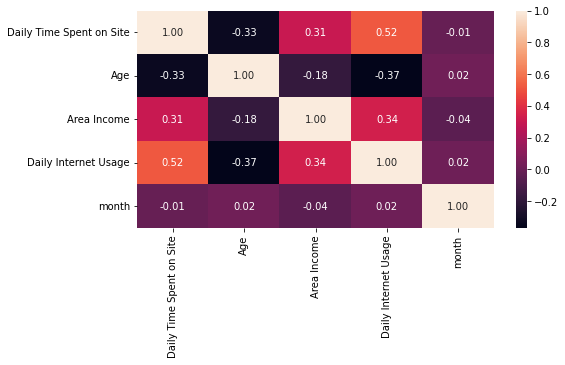

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

Observasi :

* Feature Daily Time Spent on Site berkorelasi positif cukup kuat dengan Daily Internet Usage
* Feature Age berkorelasi negatif lemah dengan feature Daily Time Spent on Site, Area Income, dan Daily Internet Usage
* Feature Area Income berkorelasi positif dengan feature Daily Time Spent on Site dan Daily Internet Usage dan berkorelasi negatif dengan feature Age

#Cleaning Data and Preprocessing

In [ ]:
df1 = dataset.copy()

In [ ]:
#check columns
df1.columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category'],
      dtype='object')

In [ ]:
df1.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
nums = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city','province', 'category']

##Check Missing Values

In [ ]:
df1.shape

(1000, 10)

In [ ]:
df1.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
#persentase null values
pst = round(df1.isnull().sum()*100/df1.shape[0],3)
pst

Daily Time Spent on Site    1.3
Age                         0.0
Area Income                 1.3
Daily Internet Usage        1.1
Male                        0.3
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64

In [ ]:
df1.describe().transpose()[['mean','50%']]

,mean,50%
Daily Time Spent on Site,6.492952e+01,6.811000e+01
Age,3.600900e+01,3.500000e+01
Area Income,3.848647e+08,3.990683e+08
Daily Internet Usage,1.798636e+02,1.826500e+02


In [ ]:
df1[cats].describe().transpose()

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


* Pada feature numerik nilai yang kosong diisi dengan nlai median dari masing-masing feature. Penggunaan nilai median sebagai nilai yang diinputkan untuk nilai yang kosong karena distribusi data cenderung skewed.
* Sedangkan, Pada feature kategorik nilai kosong diisi dengan modus dari feature tersebut.

In [ ]:
# imputation median to null values for numerical feature
df1.fillna(df1.median(),inplace=True)

#imputation mode for categorical feature
df1['Male'].fillna('Perempuan',inplace=True)

#recheck null values
df1.isnull().sum() 

<ipython-input-37-f69dced937d5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.fillna(df1.median(),inplace=True)


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

##Check Duplicated Data

In [ ]:
df1.duplicated().sum()

0

Pada dataset tidak memiliki nilai yang duplikat

#Feature Engineering : Feature Timestamp
Lakukan ekstraksi pada kolom yang berhubungan dengan waktu (Hint: Buatlah kolom baru untuk mengekstraksi data waktu menjadi tahun, bulan, pekan, dan hari.)

##Mengubah tipe data feature Timestamp

In [ ]:
#check tipe data
df1.Timestamp.dtype

dtype('O')

In [ ]:
import datetime
df1.Timestamp = pd.to_datetime(df1.Timestamp)
df1.Timestamp.dtype

dtype('<M8[ns]')

##Menambah feature

In [ ]:
df1['year']=df1.Timestamp.dt.year
df1['month']=df1.Timestamp.dt.month
df1['week']=df1.Timestamp.dt.isocalendar().week
df1['day']=df1.Timestamp.dt.day

In [ ]:
print(df1.year.dtype)
print(df1.month.dtype)
print(df1.week.dtype)
print(df1.day.dtype)

int64
int64
UInt32
int64


In [ ]:
#ubah tipe data feature week
df1.week = df1.week.astype('int64')

In [ ]:
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,year,month,week,day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3


#Feature Engineering : Feature province

In [ ]:
df1.replace('Daerah Khusus Ibukota Jakarta','DKI Jakarta',inplace=True)

#Feature Encoding

In [ ]:
df_encode = df1.copy()

#Label Encoding

In [ ]:
df_encode.Male.unique()

array(['Perempuan', 'Laki-Laki'], dtype=object)

In [ ]:
#mengubah label Laki-Laki menjadi 1 dan label perempuan menjadi 0
df_encode['Male'] = np.where(df_encode['Male']=='Laki-Laki',1,0)

#check label
df_encode.Male.unique()

array([0, 1])

In [ ]:
df_encode['Clicked on Ad'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#mengubah label Yes menjadi 1 dan label No menjadi 0
df_encode['Clicked on Ad'] = np.where(df_encode['Clicked on Ad']=='Yes',1,0)

#check label
df_encode['Clicked on Ad'].unique()

array([0, 1])

#One Hot Encoding (OHE)

Candidate OHE: city, province, category

In [ ]:
df_encode.city.nunique()

30

In [ ]:
df_encode.city.nunique()

30

In [ ]:
df_encode.province.nunique()

16

In [ ]:
df_encode.province.unique()

array(['DKI Jakarta', 'Bali', 'Jawa Timur', 'Kepulauan Riau',
       'Sumatra Utara', 'Jawa Barat', 'Lampung', 'Banten',
       'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

Melakukan OHE pada feature category

In [ ]:
to_ohe = ['province','category']

In [ ]:
df_encode[to_ohe].columns

Index(['province', 'category'], dtype='object')

In [ ]:
for cat in to_ohe :
  onehots = pd.get_dummies(df_encode[cat], prefix=cat)
  df_encode = df_encode.join(onehots)

In [ ]:
df_encode.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'year', 'month', 'week', 'day', 'province_Bali',
       'province_Banten', 'province_DKI Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

#Split Feature and Target

In [ ]:
dfs = df_encode.copy()

* drop feature Timestamp karena sudah dipecah menjadi 3 feature baru.
* drop feature year karena hanya ada 1 nilai unik
* drop feature day karena terlalu banyak nilai unik

In [ ]:
dfs.drop(columns=['Timestamp','year','day'],inplace=True)

In [ ]:
dfs.shape

(1000, 37)

In [ ]:
dfs.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'city', 'province',
       'category', 'month', 'week', 'province_Bali', 'province_Banten',
       'province_DKI Jakarta', 'province_Jawa Barat', 'province_Jawa Tengah',
       'province_Jawa Timur', 'province_Kalimantan Barat',
       'province_Kalimantan Selatan', 'province_Kalimantan Timur',
       'province_Kepulauan Riau', 'province_Lampung', 'province_Riau',
       'province_Sulawesi Selatan', 'province_Sumatra Barat',
       'province_Sumatra Selatan', 'province_Sumatra Utara', 'category_Bank',
       'category_Electronic', 'category_Fashion', 'category_Finance',
       'category_Food', 'category_Furniture', 'category_Health',
       'category_House', 'category_Otomotif', 'category_Travel'],
      dtype='object')

In [ ]:
# Split features vs target
X = dfs[[col for col in dfs.columns if (str(dfs[col].dtype) != 'object') and col not in ['Clicked on Ad']]]
y = dfs['Clicked on Ad'].values 
print(X.shape)
print(y.shape)

(1000, 33)
(1000,)


In [ ]:
X.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'month', 'week', 'province_Bali',
       'province_Banten', 'province_DKI Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

#Split Data Into Train set and Test set

* X1 dan y1 digunakan untuk eksperimen 1
* X2 dan y2 digunakan untuk eksperimen 2

In [ ]:
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

#Experiment 1 : Modelling tanpa Normalisasi/Standarisasi

In [ ]:
from sklearn.model_selection import train_test_split
# 70 : 30
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1,y1,test_size=0.3, random_state=1)
# 80 : 20
X1_train2, X1_test2, y1_train2, y1_test2 = train_test_split(X1,y1,test_size=0.2, random_state=1)

In [ ]:
print('Split into 70:30')
print('Total rows & column of train set:',X1_train1.shape)
print('Total rows & column of test set:',X1_test1.shape)
print('\nSplit into 80:20')
print('Total rows & column of train set:',X1_train2.shape)
print('Total rows & column of test set:',X1_test2.shape)

Split into 70:30
Total rows & column of train set: (700, 33)
Total rows & column of test set: (300, 33)

Split into 80:20
Total rows & column of train set: (800, 33)
Total rows & column of test set: (200, 33)


In [ ]:
#Function Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model,  y_train_pred, y_test_pred, y_train, y_test):
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_train_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred, zero_division=0))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

# confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
def cfm(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale = 1.5)
    ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize=18)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

##Dataset 70:30

In [ ]:
#check dataset
print(X1_train1.shape)
print(X1_test1.shape)

(700, 33)
(300, 33)


##Default Parameter

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X1_train1, y1_train1)

y_train_pred = logreg.predict(X1_train1)
y_pred = logreg.predict(X1_test1)

# Check Model Performance
eval_classification(logreg, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00
AUC (Train Set): 0.50
AUC (Test Set): 0.50


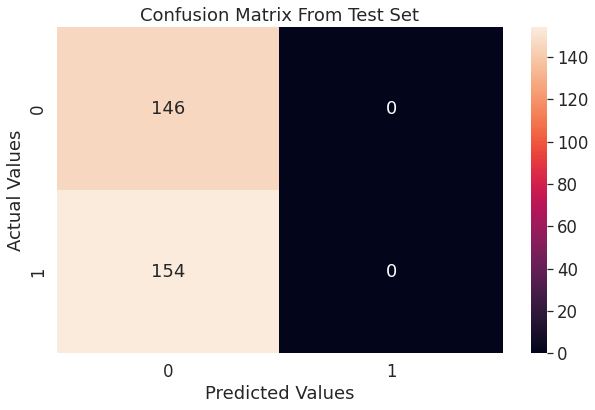

In [ ]:
cfm(y1_test1,y_pred)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X1_train1,y1_train1)

y_train_pred = dt.predict(X1_train1)
y_pred = dt.predict(X1_test1)

eval_classification(dt, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 1.00
Recall (Test Set): 0.92
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
AUC (Train Set): 1.00
AUC (Test Set): 0.94


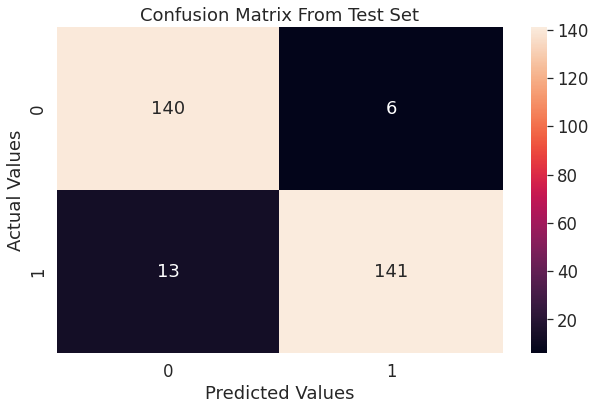

In [ ]:
cfm(y1_test1,y_pred)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X1_train1, y1_train1)

y_train_pred = rf.predict(X1_train1)
y_pred = rf.predict(X1_test1)

eval_classification(rf, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 1.00
Recall (Test Set): 0.92
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


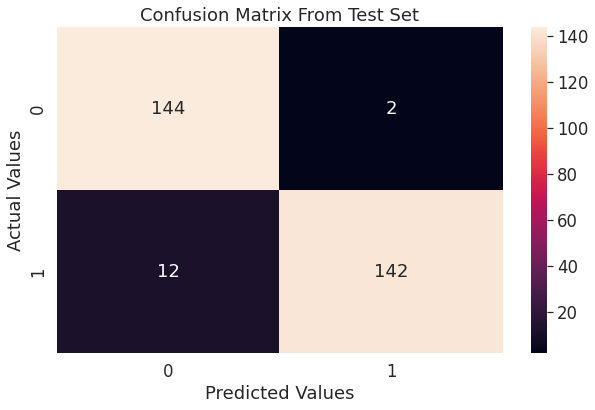

In [ ]:
cfm(y1_test1,y_pred)

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X1_train1,y1_train1)

y_train_pred = knn.predict(X1_train1)
y_pred = knn.predict(X1_test1)

eval_classification(knn, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.65
Precision (Train Set): 0.80
Precision (Test Set): 0.69
Recall (Train Set): 0.75
Recall (Test Set): 0.58
F1-Score (Train Set): 0.77
F1-Score (Test Set): 0.63
AUC (Train Set): 0.78
AUC (Test Set): 0.65


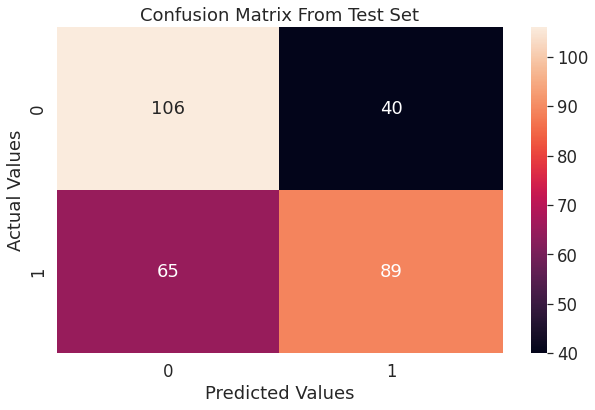

In [ ]:
cfm(y1_test1,y_pred)

##Hyperparameter Tuning

##Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [0.0001, 0.001, 0.002],
                       solver=['newton-cg', 'lbfgs','liblinear', 'sag', 'saga'])

logreg = LogisticRegression(random_state=1)
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, cv=5, scoring='recall',random_state=1)
logreg_tuned.fit(X1_train1, y1_train1)

y_train_pred = logreg_tuned.predict(X1_train1)
y_pred = logreg_tuned.predict(X1_test1)

eval_classification(logreg_tuned, y_train_pred, y_pred, y1_train1, y1_test1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.99
Recall (Train Set): 0.94
Recall (Test Set): 0.92
F1-Score (Train Set): 0.96
F1-Score (Test Set): 0.95
AUC (Train Set): 0.96
AUC (Test Set): 0.95


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

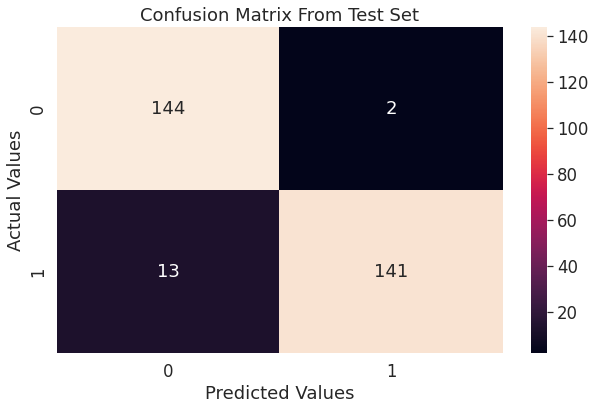

In [ ]:
cfm(y1_test1,y_pred)

##Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)], 
                       min_samples_split=[2, 5, 10, 100], 
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_tuned.fit(X1_train1, y1_train1)

y_train_pred = dt_tuned.predict(X1_train1)
y_pred = dt_tuned.predict(X1_test1)

eval_classification(dt_tuned, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.88
Precision (Test Set): 0.92
Recall (Train Set): 0.85
Recall (Test Set): 0.80
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.86
AUC (Train Set): 0.87
AUC (Test Set): 0.87


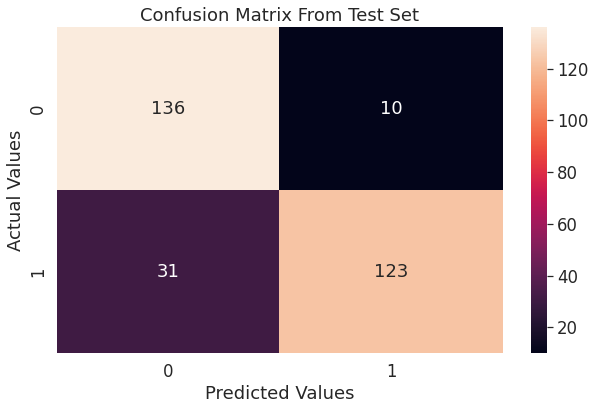

In [ ]:
cfm(y1_test1,y_pred)

##Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X1_train2,y1_train2)

y_train_pred = rf_tuned.predict(X1_train2)
y_pred = rf_tuned.predict(X1_test2)

eval_classification(rf_tuned, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Train Set): 0.99
Recall (Test Set): 0.92
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.96
AUC (Train Set): 0.99
AUC (Test Set): 0.96


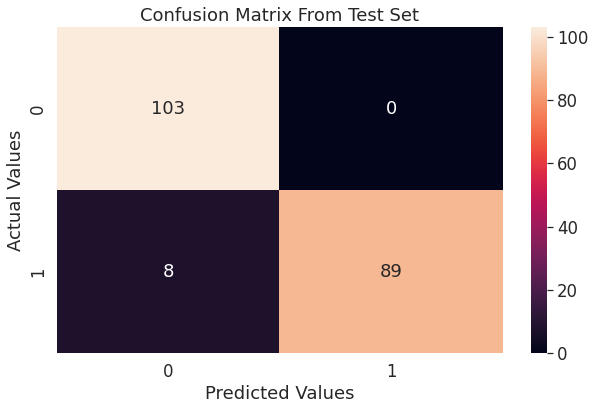

In [ ]:
cfm(y1_test2,y_pred)

##KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='recall')
knn_tuned.fit(X1_train2, y1_train2)

y_train_pred = knn_tuned.predict(X1_train2)
y_pred = knn_tuned.predict(X1_test2)

eval_classification(knn_tuned, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.62
Precision (Train Set): 1.00
Precision (Test Set): 0.60
Recall (Train Set): 1.00
Recall (Test Set): 0.67
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.63
AUC (Train Set): 1.00
AUC (Test Set): 0.62


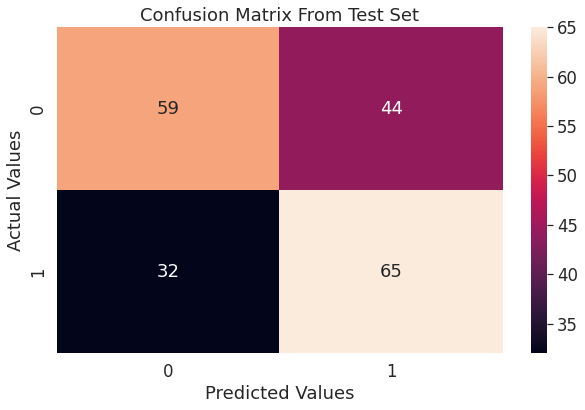

In [ ]:
cfm(y1_test2,y_pred)

##Dataset 80:20

In [ ]:
#check dataset
print(X1_train2.shape)
print(X1_test2.shape)

(800, 33)
(200, 33)


##Default Parameter

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X1_train2, y1_train2)

y_train_pred = logreg.predict(X1_train2)
y_pred = logreg.predict(X1_test2)

# Check Model Performance
eval_classification(logreg, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 0.50
Accuracy (Test Set): 0.52
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00
AUC (Train Set): 0.50
AUC (Test Set): 0.50


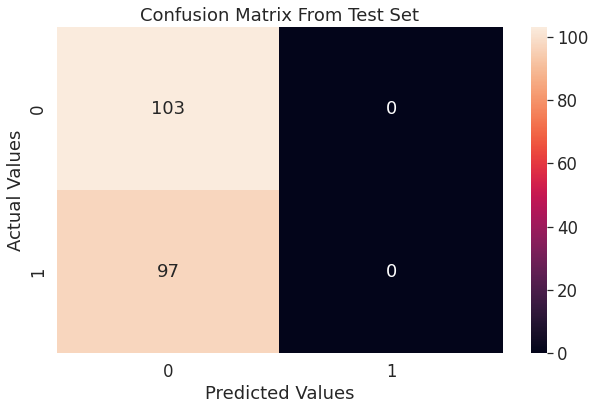

In [ ]:
cfm(y1_test2,y_pred)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X1_train2,y1_train2)

y_train_pred = dt.predict(X1_train2)
y_pred = dt.predict(X1_test2)

eval_classification(dt, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 1.00
Recall (Test Set): 0.89
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93
AUC (Train Set): 1.00
AUC (Test Set): 0.94


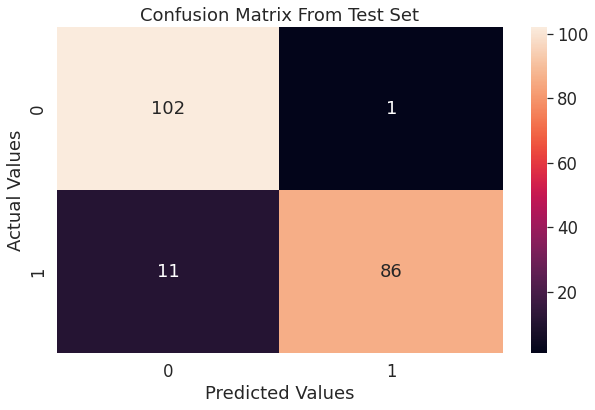

In [ ]:
cfm(y1_test2,y_pred)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X1_train2, y1_train2)

y_train_pred = rf.predict(X1_train2)
y_pred = rf.predict(X1_test2)

eval_classification(rf, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 0.92
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.96


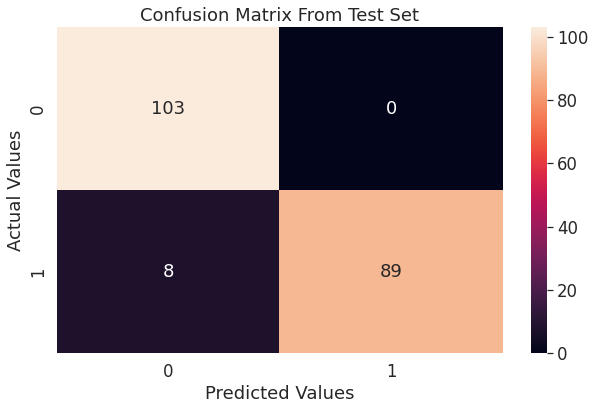

In [ ]:
cfm(y1_test2,y_pred)

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X1_train2,y1_train2)

y_train_pred = knn.predict(X1_train2)
y_pred = knn.predict(X1_test2)

eval_classification(knn, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.67
Precision (Train Set): 0.80
Precision (Test Set): 0.66
Recall (Train Set): 0.74
Recall (Test Set): 0.63
F1-Score (Train Set): 0.77
F1-Score (Test Set): 0.65
AUC (Train Set): 0.78
AUC (Test Set): 0.66


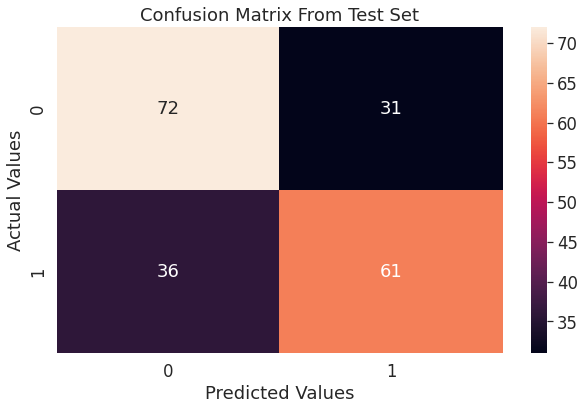

In [ ]:
cfm(y1_test2,y_pred)

##Hyperparameter Tuning

##Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [0.0001, 0.001, 0.002],
                       solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

logreg = LogisticRegression(random_state=1)
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, cv=5, random_state=1, scoring='recall')
logreg_tuned.fit(X1_train2, y1_train2)

y_train_pred = logreg_tuned.predict(X1_train2)
y_pred = logreg_tuned.predict(X1_test2)

eval_classification(logreg_tuned, y_train_pred, y_pred, y1_train2, y1_test2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.94
Precision (Train Set): 0.98
Precision (Test Set): 0.99
Recall (Train Set): 0.95
Recall (Test Set): 0.90
F1-Score (Train Set): 0.96
F1-Score (Test Set): 0.94
AUC (Train Set): 0.97
AUC (Test Set): 0.94


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

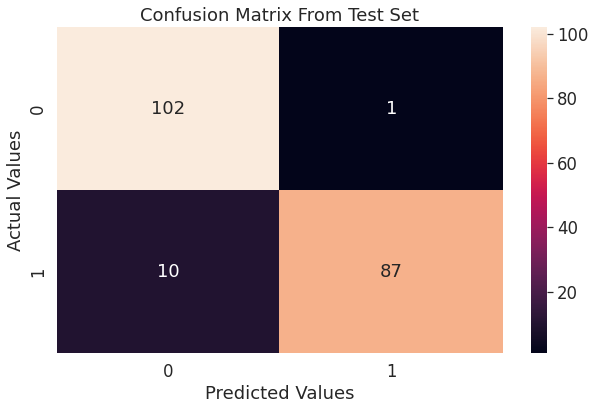

In [ ]:
cfm(y1_test2,y_pred)

##Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)], 
                       min_samples_split=[2, 5, 10, 100], 
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_tuned.fit(X1_train2, y1_train2)

y_train_pred = dt_tuned.predict(X1_train2)
y_pred = dt_tuned.predict(X1_test2)

eval_classification(dt_tuned, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.89
Precision (Train Set): 1.00
Precision (Test Set): 0.93
Recall (Train Set): 1.00
Recall (Test Set): 0.82
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.87
AUC (Train Set): 1.00
AUC (Test Set): 0.88


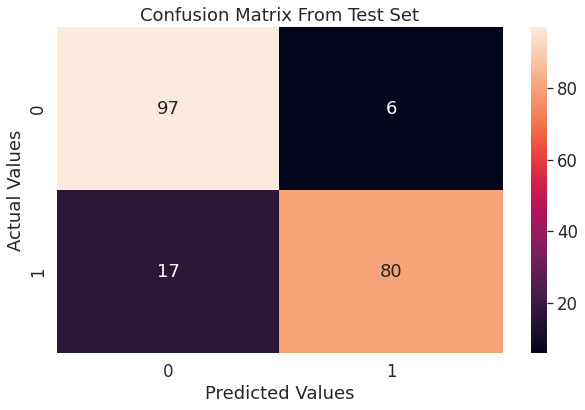

In [ ]:
cfm(y1_test2,y_pred)

##Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X1_train2,y1_train2)

y_train_pred = rf_tuned.predict(X1_train2)
y_pred = rf_tuned.predict(X1_test2)

eval_classification(rf_tuned, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Train Set): 0.99
Recall (Test Set): 0.92
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.96
AUC (Train Set): 0.99
AUC (Test Set): 0.96


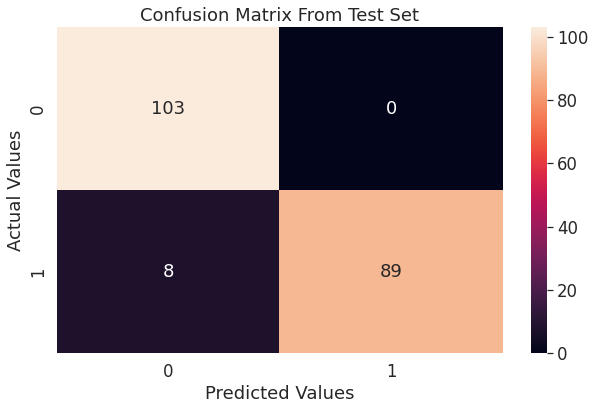

In [ ]:
cfm(y1_test2,y_pred)

##KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='recall')
knn_tuned.fit(X1_train2, y1_train2)

y_train_pred = knn_tuned.predict(X1_train2)
y_pred = knn_tuned.predict(X1_test2)

eval_classification(knn_tuned, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.62
Precision (Train Set): 1.00
Precision (Test Set): 0.60
Recall (Train Set): 1.00
Recall (Test Set): 0.67
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.63
AUC (Train Set): 1.00
AUC (Test Set): 0.62


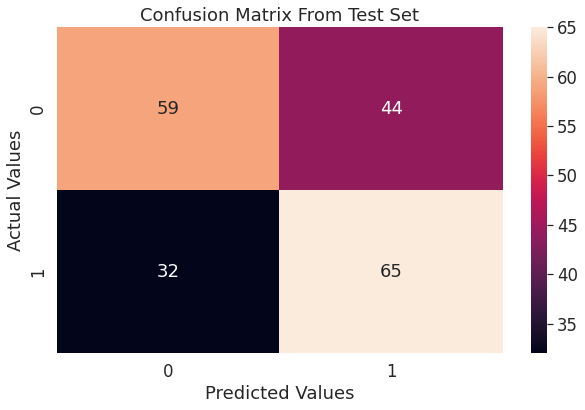

In [ ]:
cfm(y1_test2,y_pred)

#Eksperiment 2 : Modelling dengan Normalisasi/Standarisasi

In [ ]:
print(X2.shape)
print(y2.shape)

(1000, 33)
(1000,)


In [ ]:
from sklearn.model_selection import train_test_split
# 70 : 30
X2_train1, X2_test1, y2_train1, y2_test1 = train_test_split(X2,y2,test_size=0.3, random_state=1)
# 80 : 20
X2_train2, X2_test2, y2_train2, y2_test2 = train_test_split(X2,y2,test_size=0.2, random_state=1)

In [ ]:
print('Split into 70:30')
print('Total rows & column of train set:',X2_train1.shape)
print('Total rows & column of test set:',X2_test1.shape)
print('\nSplit into 80:20')
print('Total rows & column of train set:',X2_train2.shape)
print('Total rows & column of test set:',X2_test2.shape)

Split into 70:30
Total rows & column of train set: (700, 33)
Total rows & column of test set: (300, 33)

Split into 80:20
Total rows & column of train set: (800, 33)
Total rows & column of test set: (200, 33)


##Standardization Data Train (70:30)

In [ ]:
# 70%
print(X2_train1.shape)

(700, 33)


In [ ]:
X2_train1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'month', 'week', 'province_Bali',
       'province_Banten', 'province_DKI Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

In [ ]:
to_std = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','month','week']

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in range(0,len(to_std)):
  X2_train1[to_std[i]] = StandardScaler().fit_transform(X2_train1[to_std[i]].values.reshape(len(X2_train1), 1))

In [ ]:
X2_train1[to_std].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,700.0,-4.567775e-16,1.000715,-2.023191,-0.891339,0.219671,0.855391,1.692595
Age,700.0,1.268826e-16,1.000715,-1.991965,-0.743981,-0.134500,0.678140,2.767788
Area Income,700.0,1.598721e-16,1.000715,-3.017284,-0.585006,0.158775,0.782782,1.821050
Daily Internet Usage,700.0,1.065814e-16,1.000715,-1.707948,-0.921875,0.068099,0.872759,1.992168
month,700.0,1.141944e-17,1.000715,-1.463508,-0.946628,0.087131,0.604011,1.637770
week,700.0,-4.821540e-17,1.000715,-1.498867,-0.875143,-0.043512,0.684165,3.906736


##Standardization Data Test (70:30)

In [ ]:
X2_test1.shape

(300, 33)

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in range(0,len(to_std)):
  X2_test1[to_std[i]] = StandardScaler().fit_transform(X2_test1[to_std[i]].values.reshape(len(X2_test1), 1))

In [ ]:
X2_test1[to_std].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,300.0,3.449093e-16,1.001671,-2.141523,-0.797477,0.213020,0.826357,1.653772
Age,300.0,3.759955e-16,1.001671,-1.820744,-0.727861,-0.181419,0.583600,2.769367
Area Income,300.0,1.095420e-16,1.001671,-3.169662,-0.622699,0.157689,0.759641,1.760077
Daily Internet Usage,300.0,-2.738550e-16,1.001671,-1.748968,-0.975732,0.078038,0.893442,1.816528
month,300.0,5.921189e-17,1.001671,-1.460927,-0.936043,0.113725,0.638609,1.688377
week,300.0,-7.697546e-17,1.001671,-1.454119,-0.747910,-0.142587,0.664510,3.792009


##Standardization Data Train (80:20)

In [ ]:
# 80%
print(X2_train2.shape)

(800, 33)


In [ ]:
X2_train2.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'month', 'week', 'province_Bali',
       'province_Banten', 'province_DKI Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

In [ ]:
to_std = ['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage','month','week']

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in range(0,len(to_std)):
  X2_train2[to_std[i]] = StandardScaler().fit_transform(X2_train2[to_std[i]].values.reshape(len(X2_train2), 1))

In [ ]:
X2_train2[to_std].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,800.0,-5.950795e-16,1.000626,-2.012950,-0.879939,0.224400,0.858804,1.694226
Age,800.0,8.881784e-17,1.000626,-1.970146,-0.824462,-0.137052,0.664926,2.727156
Area Income,800.0,-8.548717e-17,1.000626,-3.013884,-0.575123,0.159680,0.788072,1.820650
Daily Internet Usage,800.0,4.352074e-16,1.000626,-1.713559,-0.927855,0.051190,0.872005,2.009397
month,800.0,-9.769963e-17,1.000626,-1.491079,-0.972668,0.064153,1.100975,1.619385
week,800.0,-8.881784e-18,1.000626,-1.539277,-0.796370,-0.053463,0.689444,3.979460


##Standardization Data Test (80:20)

In [ ]:
X2_test2.shape

(200, 33)

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in range(0,len(to_std)):
  X2_test2[to_std[i]] = StandardScaler().fit_transform(X2_test2[to_std[i]].values.reshape(len(X2_test2), 1))

In [ ]:
X2_test2[to_std].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,200.0,-1.199041e-16,1.002509,-2.260015,-0.686127,0.194076,0.802542,1.637483
Age,200.0,2.331468e-16,1.002509,-1.705029,-0.699442,-0.196648,0.557542,2.875979
Area Income,200.0,1.509903e-16,1.002509,-3.297016,-0.674393,0.150966,0.718026,1.746414
Daily Internet Usage,200.0,-1.079137e-15,1.002509,-1.712476,-0.916884,0.132098,0.916646,1.656673
month,200.0,0.000000e+00,1.002509,-1.360990,-0.833474,-0.305959,0.749072,1.804103
week,200.0,-3.552714e-17,1.002509,-1.306507,-0.749361,-0.099358,0.573860,3.522090


##Dataset 70:30

In [ ]:
#check dataset
print(X2_train1.shape)
print(X2_test1.shape)

(700, 33)
(300, 33)


##Default Parameter

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X2_train1, y2_train1)

y_train_pred = logreg.predict(X2_train1)
y_pred = logreg.predict(X2_test1)

# Check Model Performance
eval_classification(logreg, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 0.98
Recall (Train Set): 0.98
Recall (Test Set): 0.94
F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.96
AUC (Train Set): 0.98
AUC (Test Set): 0.96


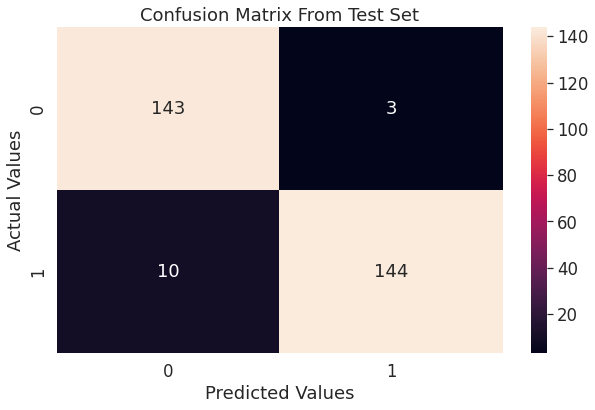

In [ ]:
cfm(y2_test1,y_pred)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X2_train1,y2_train1)

y_train_pred = dt.predict(X2_train1)
y_pred = dt.predict(X2_test1)

eval_classification(dt, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 1.00
Recall (Test Set): 0.92
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
AUC (Train Set): 1.00
AUC (Test Set): 0.94


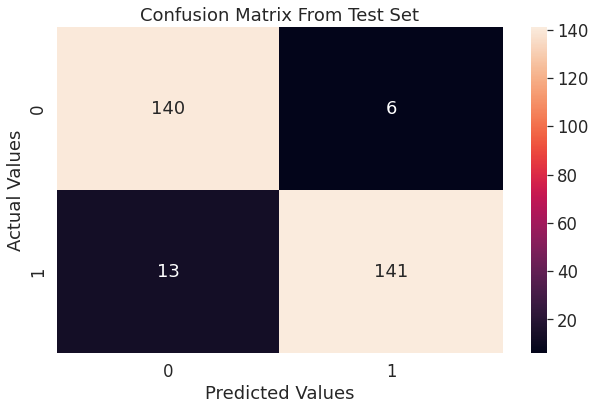

In [ ]:
cfm(y2_test1,y_pred)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X2_train1, y2_train1)

y_train_pred = rf.predict(X2_train1)
y_pred = rf.predict(X2_test1)

eval_classification(rf, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.98
Recall (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


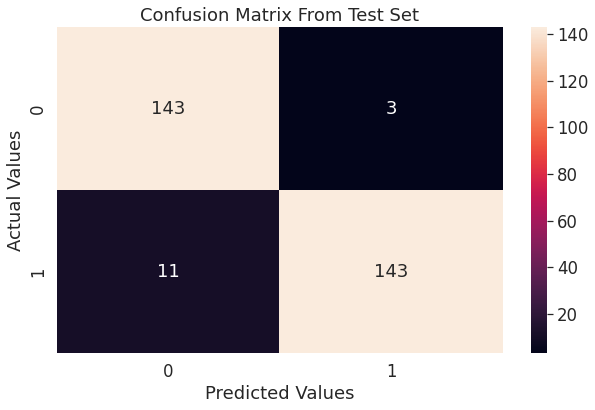

In [ ]:
cfm(y2_test1,y_pred)

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X2_train1,y2_train1)

y_train_pred = knn.predict(X2_train1)
y_pred = knn.predict(X2_test1)

eval_classification(knn, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Train Set): 0.95
Recall (Test Set): 0.92
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.96
AUC (Train Set): 0.97
AUC (Test Set): 0.96


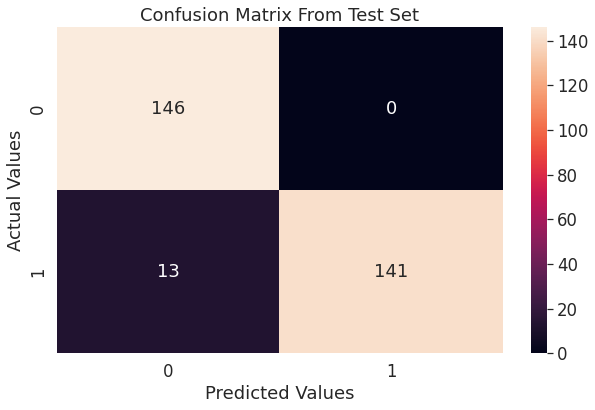

In [ ]:
cfm(y2_test1,y_pred)

##Hyperparameter Tuning

##Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = dict(penalty = ['l2','l1','elasticnet','none'],
                       C = [0.0001, 0.001, 0.002],
                       solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

logreg = LogisticRegression(random_state=1)
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, cv=5, random_state=1, scoring='recall')
logreg_tuned.fit(X2_train1, y2_train1)

y_train_pred = logreg_tuned.predict(X2_train1)
y_pred = logreg_tuned.predict(X2_test1)

eval_classification(logreg_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.97
Recall (Train Set): 0.98
Recall (Test Set): 0.93
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.95
AUC (Train Set): 0.99
AUC (Test Set): 0.95


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver sa

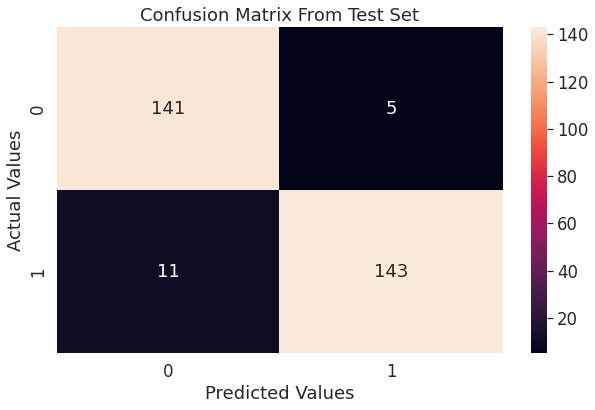

In [ ]:
cfm(y2_test1,y_pred)

##Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)], 
                       min_samples_split=[2, 5, 10, 100], 
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_tuned.fit(X2_train1, y2_train1)

y_train_pred = dt_tuned.predict(X2_train1)
y_pred = dt_tuned.predict(X2_test1)

eval_classification(dt_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.86
Precision (Train Set): 0.88
Precision (Test Set): 0.91
Recall (Train Set): 0.85
Recall (Test Set): 0.81
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.86
AUC (Train Set): 0.87
AUC (Test Set): 0.86


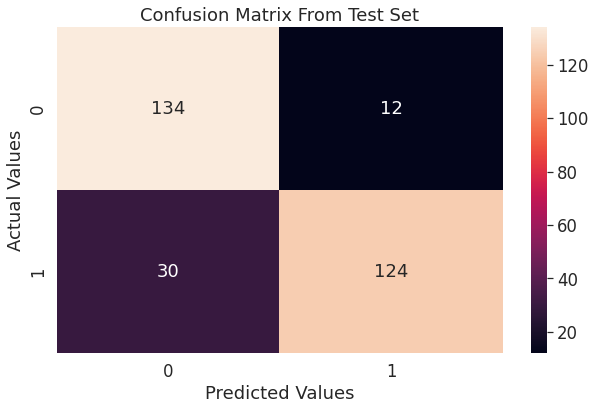

In [ ]:
cfm(y2_test1,y_pred)

##Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X2_train1,y2_train1)

y_train_pred = rf_tuned.predict(X2_train1)
y_pred = rf_tuned.predict(X2_test1)

eval_classification(rf_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 0.99
Recall (Train Set): 0.99
Recall (Test Set): 0.93
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.96
AUC (Train Set): 0.99
AUC (Test Set): 0.96


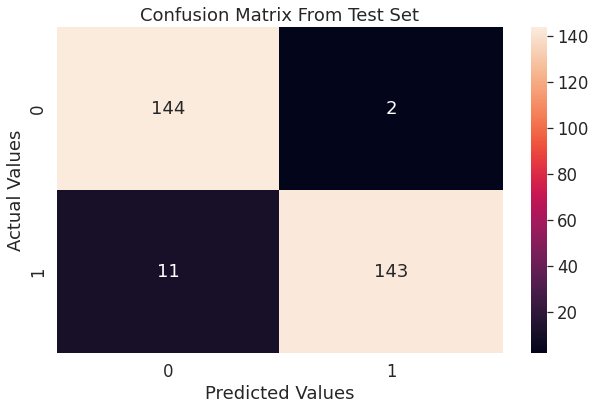

In [ ]:
cfm(y2_test1,y_pred)

##KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='recall')
knn_tuned.fit(X2_train1, y2_train1)

y_train_pred = knn_tuned.predict(X2_train1)
y_pred = knn_tuned.predict(X2_test1)

eval_classification(knn_tuned, y_train_pred, y_pred, y2_train1, y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 1.00
Recall (Test Set): 0.90
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93
AUC (Train Set): 1.00
AUC (Test Set): 0.93


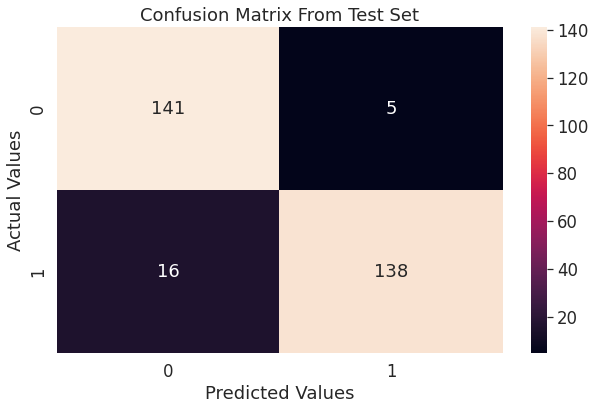

In [ ]:
cfm(y2_test1,y_pred)

##Dataset 80:20

In [ ]:
#check dataset
print(X2_train2.shape)
print(X2_test2.shape)

(800, 33)
(200, 33)


##Default Parameter

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X2_train2, y2_train2)

y_train_pred = logreg.predict(X2_train2)
y_pred = logreg.predict(X2_test2)

# Check Model Performance
eval_classification(logreg, y_train_pred, y_pred, y2_train2, y2_test2)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.99
Recall (Train Set): 0.98
Recall (Test Set): 0.92
F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.95
AUC (Train Set): 0.98
AUC (Test Set): 0.95


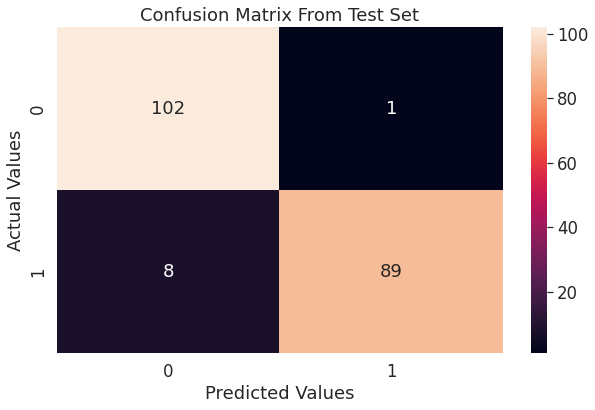

In [ ]:
cfm(y2_test2,y_pred)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X2_train2,y2_train2)

y_train_pred = dt.predict(X2_train2)
y_pred = dt.predict(X2_test2)

eval_classification(dt, y_train_pred, y_pred, y2_train2, y2_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 1.00
Recall (Test Set): 0.90
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93
AUC (Train Set): 1.00
AUC (Test Set): 0.93


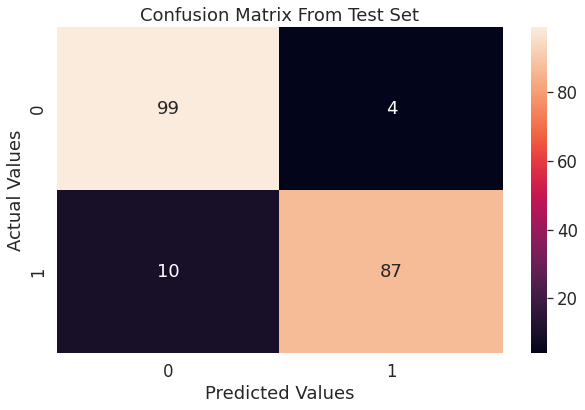

In [ ]:
cfm(y2_test2,y_pred)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X2_train2, y2_train2)

y_train_pred = rf.predict(X2_train2)
y_pred = rf.predict(X2_test2)

eval_classification(rf, y_train_pred, y_pred, y2_train2, y2_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 1.00
Recall (Test Set): 0.92
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


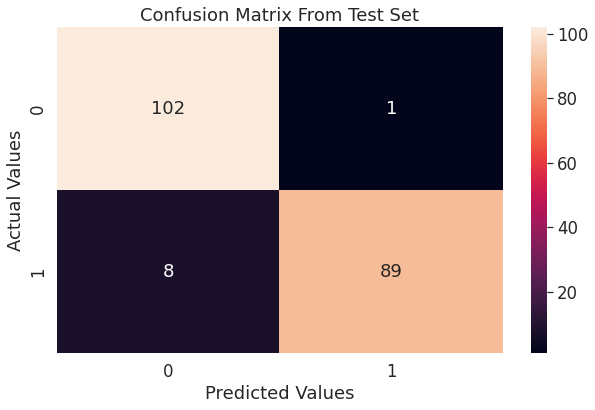

In [ ]:
cfm(y2_test2,y_pred)

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X2_train2,y2_train2)

y_train_pred = knn.predict(X2_train2)
y_pred = knn.predict(X2_test2)

eval_classification(knn, y_train_pred, y_pred, y2_train2, y2_test2)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Train Set): 0.95
Recall (Test Set): 0.92
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.96
AUC (Train Set): 0.97
AUC (Test Set): 0.96


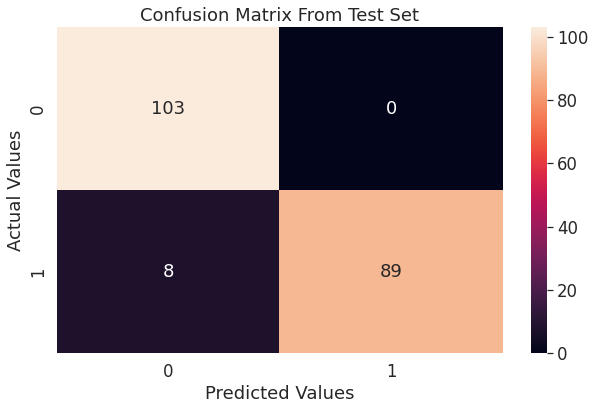

In [ ]:
cfm(y2_test2,y_pred)

##Hyperparameter Tuning

##Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = dict(penalty = ['l2','l1','elasticnet'],
                       C = [0.0001, 0.001, 0.002])

logreg = LogisticRegression(random_state=1)
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, cv=5, random_state=1, scoring='recall')
logreg_tuned.fit(X2_train2, y2_train2)

y_train_pred = logreg_tuned.predict(X2_train2)
y_pred = logreg_tuned.predict(X2_test2)

eval_classification(logreg_tuned, y_train_pred, y_pred, y2_train2, y2_test2)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.96
Precision (Train Set): 0.98
Precision (Test Set): 0.99
Recall (Train Set): 0.96
Recall (Test Set): 0.93
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.96
AUC (Train Set): 0.97
AUC (Test Set): 0.96


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

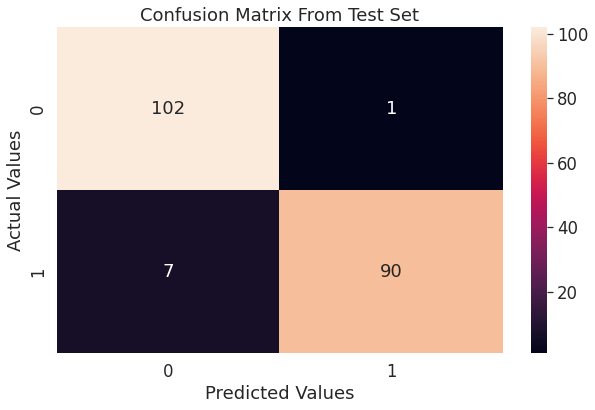

In [ ]:
cfm(y2_test2,y_pred)

##Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)], 
                       min_samples_split=[2, 5, 10, 100], 
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_tuned.fit(X2_train2, y2_train2)

y_train_pred = dt_tuned.predict(X2_train2)
y_pred = dt_tuned.predict(X2_test2)

eval_classification(dt_tuned, y_train_pred, y_pred, y2_train2, y2_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.89
Precision (Train Set): 1.00
Precision (Test Set): 0.90
Recall (Train Set): 1.00
Recall (Test Set): 0.87
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.88
AUC (Train Set): 1.00
AUC (Test Set): 0.89


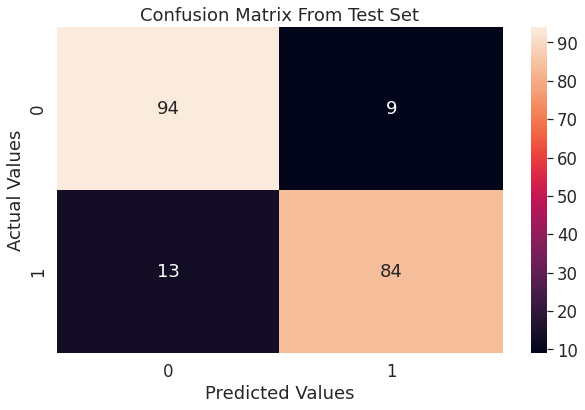

In [ ]:
cfm(y2_test2,y_pred)

##Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X2_train2,y2_train2)

y_train_pred = rf_tuned.predict(X2_train2)
y_pred = rf_tuned.predict(X2_test2)

eval_classification(rf_tuned, y_train_pred, y_pred, y2_train2, y2_test2)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Train Set): 0.99
Recall (Test Set): 0.92
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.96
AUC (Train Set): 0.99
AUC (Test Set): 0.96


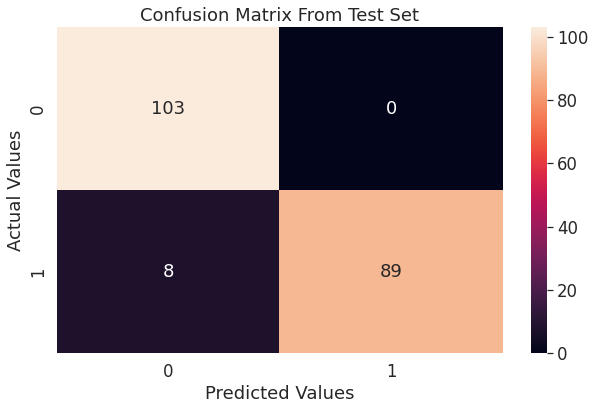

In [ ]:
cfm(y2_test2,y_pred)

##KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='recall')
knn_tuned.fit(X2_train2, y2_train2)

y_train_pred = knn_tuned.predict(X2_train2)
y_pred = knn_tuned.predict(X2_test2)

eval_classification(knn_tuned, y_train_pred, y_pred, y2_train2, y2_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92
Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 1.00
Recall (Test Set): 0.88
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.91
AUC (Train Set): 1.00
AUC (Test Set): 0.92


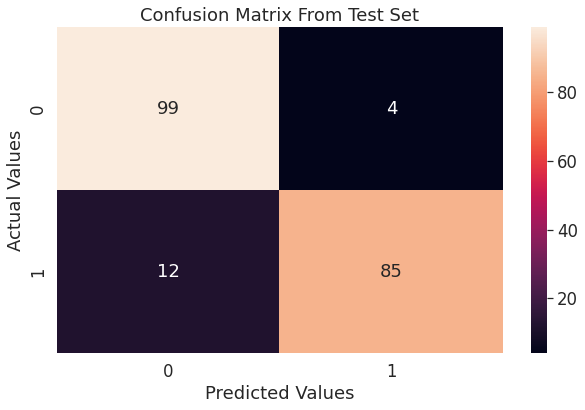

In [ ]:
cfm(y2_test2,y_pred)

#Selected Model

Model yang dipilih adalah model Random Forest yang telah di tuning parameternya. Metrix utama yang digunakan adalah Precision dimana tidak memperbolehkan FP besar dan secondary matrixnya adalah Recall.

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X2_train1,y2_train1)

y_train_pred = rf_tuned.predict(X2_train1)
y_pred = rf_tuned.predict(X2_test1)

eval_classification(rf_tuned, y_train_pred, y_pred, y2_train1, y2_test1)
     

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 0.99
Recall (Train Set): 0.99
Recall (Test Set): 0.93
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.96
AUC (Train Set): 0.99
AUC (Test Set): 0.96


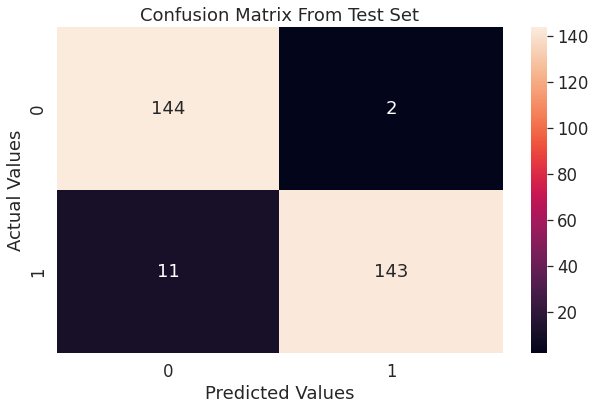

In [ ]:
cfm(y2_test1,y_pred)

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1300
Best bootstrap: True
Best criterion: gini
Best max_depth: 90
Best min_samples_split: 8
Best min_samples_leaf: 3
Best max_features: auto
Best n_jobs: -1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_best = RandomForestClassifier(random_state=1,
                                 n_estimators=1300,
                                 bootstrap=True,
                                 criterion='gini',
                                 max_depth=90,
                                 min_samples_split=8,
                                 min_samples_leaf=3,
                                 max_features='auto',
                                 n_jobs=-1)
rf_best.fit(X2_train1,y2_train1)

y_train_pred_best = rf_best.predict(X2_train1)
y_pred_best = rf_best.predict(X2_test1)

eval_classification(rf_best, y_train_pred_best, y_pred_best, y2_train1, y2_test1)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 0.99
Recall (Train Set): 0.99
Recall (Test Set): 0.93
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.96
AUC (Train Set): 0.99
AUC (Test Set): 0.96


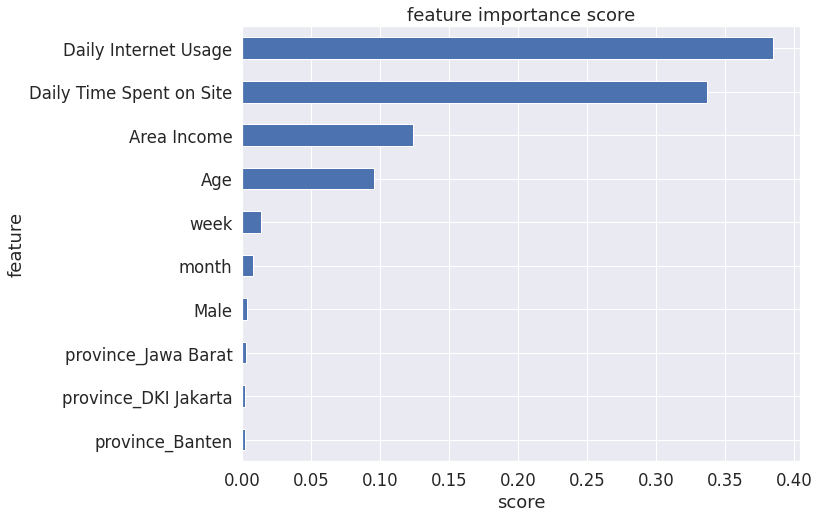

In [ ]:
show_feature_importance(rf_tuned)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 28.1 MB/s eta 0:00:00


In [ ]:
model = rf_best

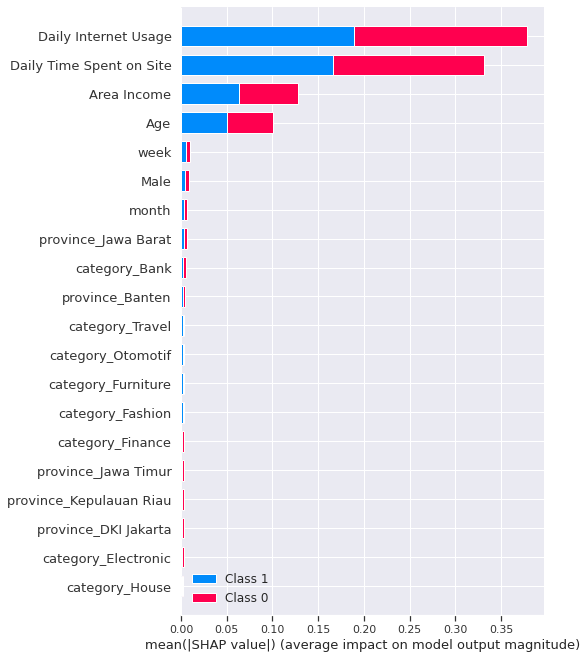

In [ ]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X2_train1)
shap.summary_plot(shap_values, X2_train1, plot_type="bar")

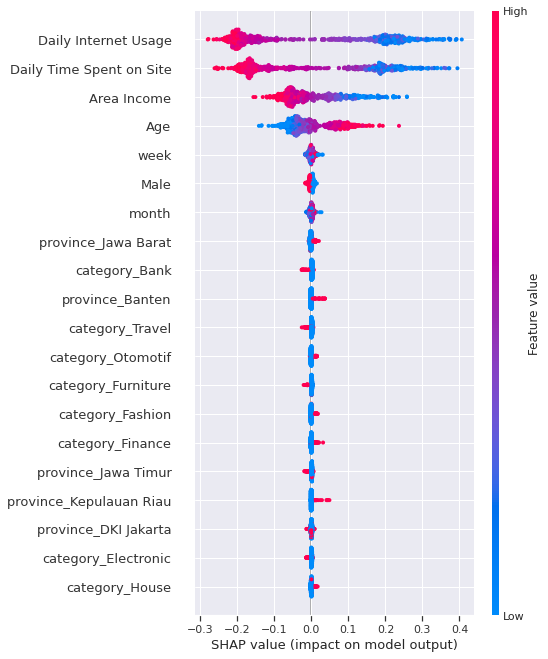

In [ ]:
f = plt.figure(figsize = (12,8))
shap.summary_plot(shap_values[1], X2_train1)

#Simulation

In [ ]:
df3 = df1.copy()
df3.shape

(1000, 14)

In [ ]:
df3.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,year,month,week,day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,DKI Jakarta,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3


* Di bawah 15 tahun: Kelompok usia anak-anak.
* 15-24 tahun: Kelompok usia muda.
* 25-34 tahun: Kelompok usia pekerja awal.
* 35-44 tahun: Kelompok usia paruh baya.
* 45-54 tahun: Kelompok usia pra-pensiun.
* 55-64 tahun: Kelompok usia pensiun.

In [ ]:
def group(x):
  if x['Age']>54:
    result = 'pensiun'
  elif x['Age']>45 and x['Age']<=54:
    result = 'pra-pensiun'
  elif x['Age']>35 and x['Age']<=45:
    result = 'paruh baya'
  elif x['Age']>25 and x['Age']<=35:
    result = 'awal pekerja'
  elif x['Age']>15 and x['Age']<=25:
    result = 'muda'
  return result
df3['age_group'] = df3.apply(lambda x: group(x),axis=1)

In [ ]:
df3[['Age','age_group']].sample(5)

,Age,age_group
115,31,awal pekerja
214,40,paruh baya
423,31,awal pekerja
872,33,awal pekerja
2,26,awal pekerja


In [ ]:
orders = ["muda","awal pekerja","paruh baya","pra-pensiun","pensiun"]
df3['age_group'] = pd.Categorical(df3['age_group'], categories=orders, ordered=True)

In [ ]:
df3.groupby(['age_group']).agg({'Age':'count'}).reset_index()

,age_group,Age
0,muda,98
1,awal pekerja,424
2,paruh baya,321
3,pra-pensiun,131
4,pensiun,26


In [ ]:
dfg1 = df3.groupby(['Clicked on Ad','age_group']).agg({'Daily Internet Usage':['count','mean'],
                                                       'Daily Time Spent on Site':['mean']}).reset_index()
dfg1.columns=['is_click','age_group','total','avg_daily_internet_usage','avg_time_spent']
dfg1 = dfg1.sort_values(['is_click','avg_daily_internet_usage'],ascending=[False,False])
dfg1

,is_click,age_group,total,avg_daily_internet_usage,avg_time_spent
5,Yes,muda,21,161.460476,61.531905
9,Yes,pensiun,26,158.625769,60.204615
6,Yes,awal pekerja,131,151.149313,53.508092
8,Yes,pra-pensiun,117,146.557179,52.068974
7,Yes,paruh baya,205,138.329659,52.133024
3,No,pra-pensiun,14,226.681429,76.118571
2,No,paruh baya,116,217.061121,78.691897
1,No,awal pekerja,293,215.139932,77.138430
0,No,muda,77,203.706104,71.805195
4,No,pensiun,0,NaN,NaN


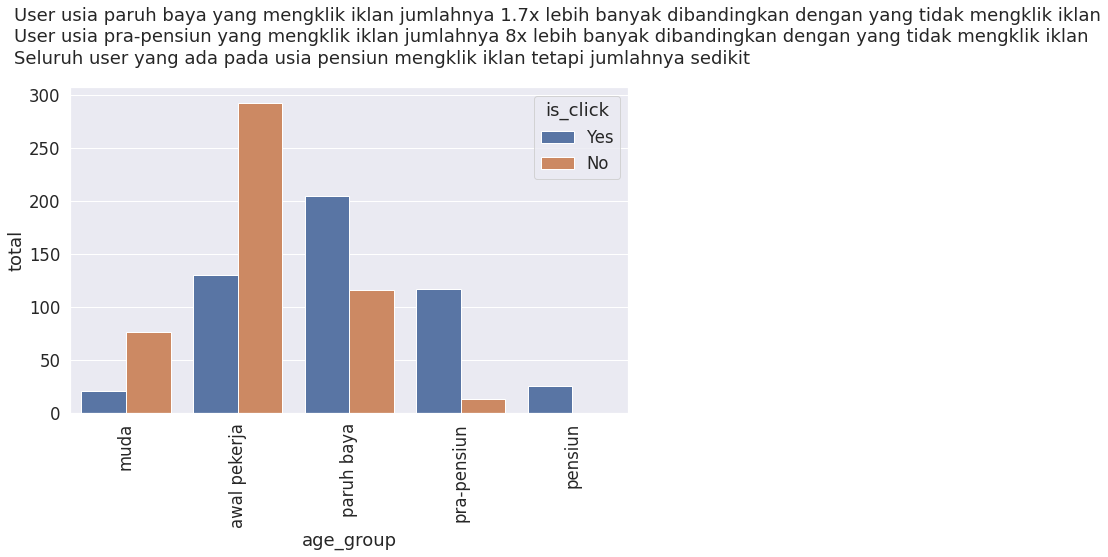

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='age_group',y='total', hue='is_click',data=dfg1)
plt.text(x=-1,y=370,s='User usia paruh baya yang mengklik iklan jumlahnya 1.7x lebih banyak dibandingkan dengan yang tidak mengklik iklan')
plt.text(x=-1,y=350,s='User usia pra-pensiun yang mengklik iklan jumlahnya 8x lebih banyak dibandingkan dengan yang tidak mengklik iklan')
plt.text(x=-1,y=330,s='Seluruh user yang ada pada usia pensiun mengklik iklan tetapi jumlahnya sedikit')
plt.xticks(rotation=90)
plt.show()
     

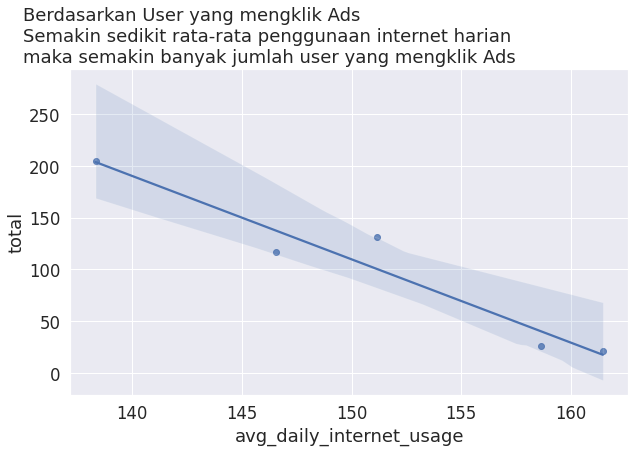

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(y='total',x='avg_daily_internet_usage',data=dfg1[dfg1['is_click']=='Yes'])
plt.text(x=135,y=300,s='Berdasarkan User yang mengklik Ads \nSemakin sedikit rata-rata penggunaan internet harian\nmaka semakin banyak jumlah user yang mengklik Ads')
plt.show()

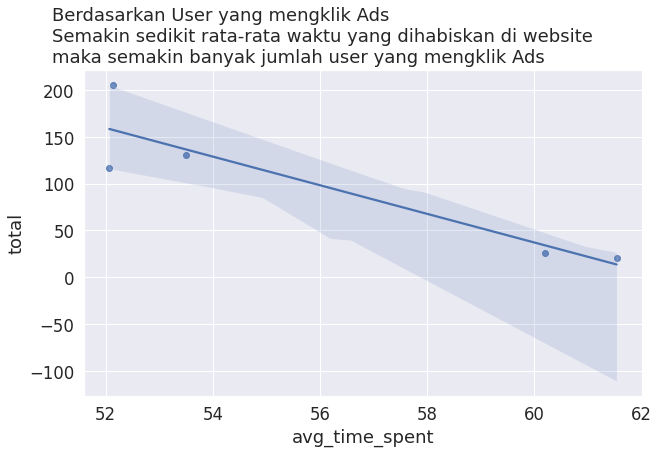

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(y='total',x='avg_time_spent',data=dfg1[dfg1['is_click']=='Yes'])
plt.text(x=51,y=230,s='Berdasarkan User yang mengklik Ads \nSemakin sedikit rata-rata waktu yang dihabiskan di website\nmaka semakin banyak jumlah user yang mengklik Ads')
plt.show()

In [ ]:
dfg2 = df3.groupby(['Clicked on Ad','age_group','category']).agg({'Daily Internet Usage':['count','mean'],
                                                       'Daily Time Spent on Site':['mean']}).reset_index()
dfg2.columns=['is_click','age_group','category','total','avg_daily_internet_usage','avg_time_spent']
dfg2 = dfg2.sort_values(['is_click','total'],ascending=[True,False])
dfg2[dfg2['is_click']=='Yes']

,is_click,age_group,category,total,avg_daily_internet_usage,avg_time_spent
76,Yes,paruh baya,Health,24,144.375000,49.877917
71,Yes,paruh baya,Electronic,22,142.938636,48.672273
77,Yes,paruh baya,House,22,138.920909,53.214091
79,Yes,paruh baya,Travel,22,142.023182,53.028182
72,Yes,paruh baya,Fashion,21,130.128095,57.838095
73,Yes,paruh baya,Finance,20,129.515500,47.873000
70,Yes,paruh baya,Bank,19,138.211053,54.749474
74,Yes,paruh baya,Food,19,140.813158,55.326842
78,Yes,paruh baya,Otomotif,19,137.040526,52.081053
75,Yes,paruh baya,Furniture,17,137.584118,48.766471


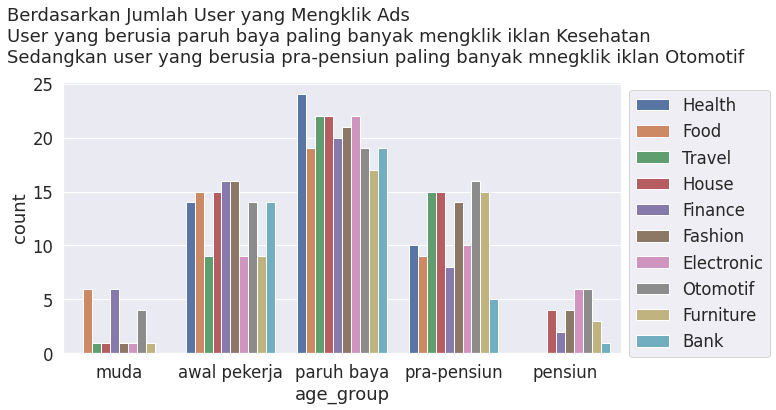

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='age_group', hue='category',data=df3[df3['Clicked on Ad']=='Yes'])
plt.text(x=-1,y=27,s='Berdasarkan Jumlah User yang Mengklik Ads\nUser yang berusia paruh baya paling banyak mengklik iklan Kesehatan\nSedangkan user yang berusia pra-pensiun paling banyak mnegklik iklan Otomotif')
plt.legend(bbox_to_anchor=(1,1))
plt.show()